In [1]:
!pip install qiskit qiskit-aer --upgrade


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from qiskit import QuantumCircuit, transpile # transpile MUST be imported to fix the NameError
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

In [3]:
def run_and_display(qc, shots, task_name):
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    counts = job.result().get_counts(qc)

    print(f"\n--- {task_name} (Shots={shots}) ---")
    print("Counts:", counts)
    display(plot_histogram(counts, title=task_name))

def main():
    # -----------------------------------------------------------------
    # BASELINE: The original circuit (1 qubit, Hadamard, 10 shots)
    qc_base = QuantumCircuit(1, 1)
    qc_base.h(0)
    qc_base.measure(0, 0)
    run_and_display(qc_base, shots=10, task_name="Baseline: H-Gate (10 Shots)")
    # -----------------------------------------------------------------


    # --- Task 1: Change the number of shots to 100 ---
    # Reuses qc_base, only shots parameter changes
    run_and_display(qc_base, shots=100, task_name="Task 1: H-Gate (100 Shots)")


    # --- Task 2: Add a second qubit, apply Hadamard to both ---
    qc_task2 = QuantumCircuit(2, 2) # New circuit: 2 qubits, 2 classical bits
    qc_task2.h(0)
    qc_task2.h(1) 
    qc_task2.measure(0, 0)
    qc_task2.measure(1, 1) # Measure both qubits

    run_and_display(qc_task2, shots=100, task_name="Task 2: 2 Qubits, H on Both (100 Shots)")


    # --- Task 3: Replace the Hadamard gate with an X gate ---
    qc_task3 = QuantumCircuit(1, 1)
    qc_task3.x(0) # Replaces qc.h(0) with qc.x(0)
    qc_task3.measure(0, 0)

    run_and_display(qc_task3, shots=100, task_name="Task 3: X-Gate (100 Shots)")


--- Baseline: H-Gate (10 Shots) (Shots=10) ---
Counts: {'1': 5, '0': 5}


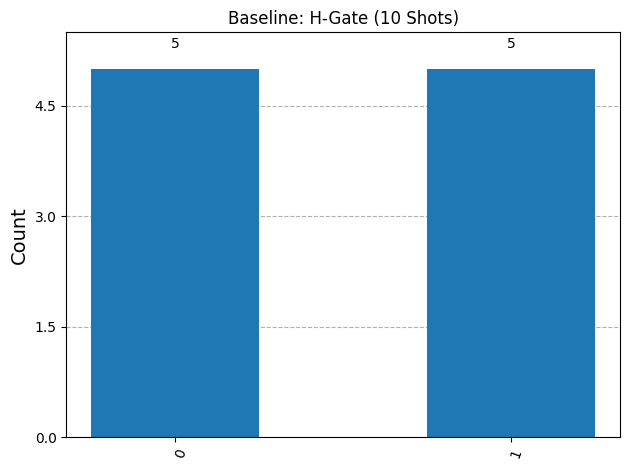


--- Task 1: H-Gate (100 Shots) (Shots=100) ---
Counts: {'1': 48, '0': 52}


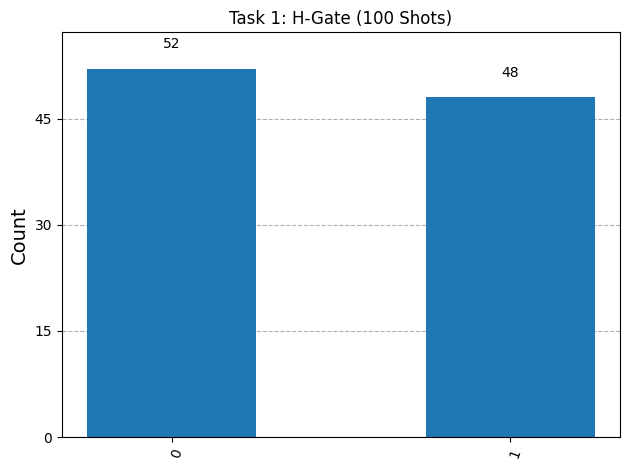


--- Task 2: 2 Qubits, H on Both (100 Shots) (Shots=100) ---
Counts: {'00': 25, '10': 26, '11': 18, '01': 31}


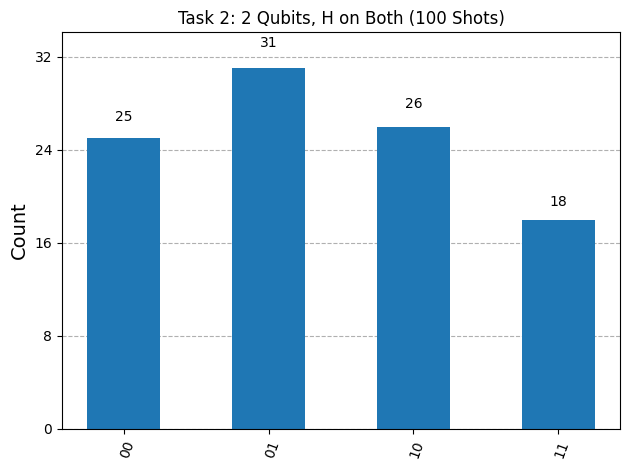


--- Task 3: X-Gate (100 Shots) (Shots=100) ---
Counts: {'1': 100}


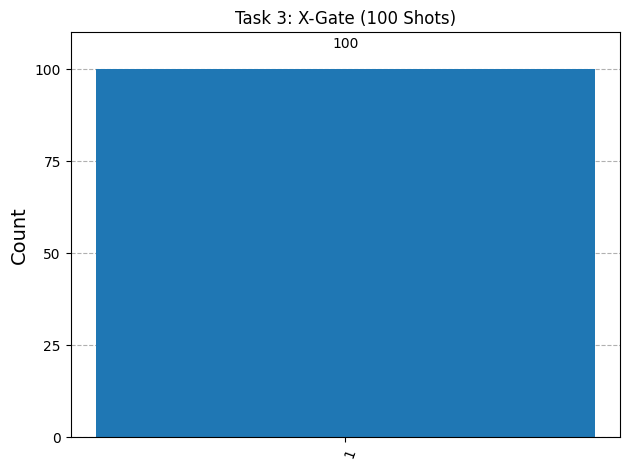

In [4]:
if __name__ == "__main__":
    main()

In [5]:
#Task_1